In [24]:
import sys
import os

import spotipy
import json
import pprint
import pandas as pd
import numpy as np
import configparser
import seaborn as sns
import matplotlib.pyplot as plt


import spotipy.oauth2 as oauth2
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [25]:
#Authenticate with config file and spotipy client_id, client_secret, username, values

config = configparser.ConfigParser()
config.read('config_ernflerberg.cfg')
client_id = config.get('SPOTIFY', 'CLIENT_ID')
client_secret = config.get('SPOTIFY', 'CLIENT_SECRET')
username = config.get('SPOTIFY', 'USERNAME')


auth = oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
)

token = auth.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [26]:
playlistDictionary={
                   "Liked": "3s3OCt230DDEIGX8xOY58A",  #like: spotify:user:ernflerberg:playlist:3s3OCt230DDEIGX8xOY58A
                   "Dislike": "3tfIr2Q4Qq10fsTzk3lHt6" #dislike: spotify:user:ernflerberg:playlist:3tfIr2Q4Qq10fsTzk3lHt6
                   }
#like: https://open.spotify.com/user/ernflerberg/playlist/3s3OCt230DDEIGX8xOY58A?si=5n5ZRzWwQSCE8ULvfEbLiQ
#dislike: https://open.spotify.com/playlist/4h4W1o7xGfgd60dOeME5aq?si=33-HHYLrTq69we4MYRb7WQ

In [27]:
#Pull 'disLike' Playlist
#spotify:playlist:3tfIr2Q4Qq10fsTzk3lHt6

uri = 'spotify:user:ernflerberg:playlist:3tfIr2Q4Qq10fsTzk3lHt6'
username = username
disliked_playlist_id = '3tfIr2Q4Qq10fsTzk3lHt6'
disliked_results = spotify.user_playlist(username, disliked_playlist_id)

In [28]:
#Pull 'Like' Playlist

uri = 'spotify:user:ernflerberg:playlist:3s3OCt230DDEIGX8xOY58A'
username = username
liked_playlist_id = '3s3OCt230DDEIGX8xOY58A'
liked_results = spotify.user_playlist(username, liked_playlist_id)

In [29]:
#Check that the 'Liked' playlist connects to a song
liked_results['tracks']['items'][0]['track']['id']

'6yl8Es1tCYD9WdSkeVLFw4'

In [30]:
#Check that the 'Disliked' playlist connects to a song
disliked_results['tracks']['items'][0]['track']['id']

'53div1TeIZI0aD9OWbey7k'

In [31]:
#Pull the 'Liked' playlist trac  k information using the Spotipy API JSON 
ldf = []
for i in liked_results['tracks']['items']:
    ldf.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
ldf = pd.DataFrame(ldf)  
#Add column names for the "Liked" Playlist
ldf.columns = ['song_id','added_at','artist','album','duration_ms','songname','popularity']
#Add column "user_preference" to the Liked Playlist
ldf['user_preference'] = 1
ldf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference
0,6yl8Es1tCYD9WdSkeVLFw4,2019-06-06T05:11:15Z,AC/DC,Who Made Who,210880,You Shook Me All Night Long,73,1
1,3fkPMWQ6cBNBLuFcPyMS8s,2019-06-06T05:11:15Z,Blue Öyster Cult,Fire of Unknown Origin,271000,Burnin' for You,66,1
2,5EWPGh7jbTNO2wakv8LjUI,2019-06-06T05:11:15Z,Lynyrd Skynyrd,Pronounced' Leh-'Nerd 'Skin-'Nerd,547106,Free Bird,71,1
3,6QDbGdbJ57Mtkflsg42WV5,2019-06-06T05:11:15Z,Van Halen,1984 (Remastered),282746,Hot for Teacher - 2015 Remaster,67,1
4,6J17MkMmuzBiIOjRH6MOBZ,2019-06-06T05:11:15Z,AC/DC,Back In Black,266040,Rock and Roll Ain't Noise Pollution,61,1


In [32]:
#Pull the 'Disiked' playlist track information using the Spotipy API JSON
ddf = []
for i in disliked_results['tracks']['items']:
    ddf.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
ddf = pd.DataFrame(ddf)  
#Add column names for the "Disliked" Playlist
ddf.columns = ['song_id','added_at','artist','album','duration_ms','songname','popularity']
#Add column "user_preference" to the Disliked Playlist
ddf['user_preference'] = 0
ddf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference
0,53div1TeIZI0aD9OWbey7k,2019-06-27T06:13:35Z,Karl Weigl,"Weigl: Symphony No. 1 in E Major, Op. 5 & Pict...",214457,"Pictures and Tales Suite: IV. Sleep, Baby, Sleep",22,0
1,7uB0F29wF9x6kaywZhBSfc,2019-06-27T06:13:35Z,Vincent d'Indy,d'Indy: Orchestral Works,157693,"Karadec Suite, Op. 34: II. Chanson",18,0
2,2C0Pld2135Xve3lEhzypCP,2019-06-27T06:13:35Z,Gürzenich Orchester Köln,"Mussorgsky, Rimsky-Korsakov & Lyadov: Works",440186,"The Enchanted Lake, Op. 62",18,0
3,18ascogkXkFrIdJhEevnRo,2019-06-27T06:13:35Z,The Optina Pustyn Male Choir of St. Petersburg,Orthodox Chants from Russia,149866,Now Lettest Thou Depart,14,0
4,5vGj3qweOgHI47mSK0aRtC,2019-06-27T06:13:35Z,The Optina Pustyn Male Choir of St. Petersburg,Orthodox Chants from Russia,90813,"Hail, O Virgin",14,0


In [33]:
sp = spotipy.Spotify(auth=token)

In [34]:
#Pull Audio Features from Spotipy on song_id for Liked playlist
laf = []
for i in ldf.song_id:
    x = sp.audio_features(i)
    laf.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
laf = pd.DataFrame(laf)

laf.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

#Merge the Liked Audio Features and track information together
lpaf = pd.merge(ldf, laf, on='song_id')
lpaf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6yl8Es1tCYD9WdSkeVLFw4,2019-06-06T05:11:15Z,AC/DC,Who Made Who,210880,You Shook Me All Night Long,73,1,0.529,0.768,7,-5.510,1,0.0566,0.002240,0.000685,0.2970,0.769,127.316,4
1,3fkPMWQ6cBNBLuFcPyMS8s,2019-06-06T05:11:15Z,Blue Öyster Cult,Fire of Unknown Origin,271000,Burnin' for You,66,1,0.532,0.728,9,-9.079,0,0.0352,0.106000,0.010800,0.0849,0.690,134.303,4
2,5EWPGh7jbTNO2wakv8LjUI,2019-06-06T05:11:15Z,Lynyrd Skynyrd,Pronounced' Leh-'Nerd 'Skin-'Nerd,547106,Free Bird,71,1,0.252,0.844,0,-8.121,1,0.0572,0.076500,0.000180,0.0840,0.351,118.158,4
3,6QDbGdbJ57Mtkflsg42WV5,2019-06-06T05:11:15Z,Van Halen,1984 (Remastered),282746,Hot for Teacher - 2015 Remaster,67,1,0.551,0.947,2,-4.671,1,0.1520,0.000652,0.000257,0.0637,0.466,127.657,4
4,6J17MkMmuzBiIOjRH6MOBZ,2019-06-06T05:11:15Z,AC/DC,Back In Black,266040,Rock and Roll Ain't Noise Pollution,61,1,0.576,0.659,9,-5.617,1,0.0383,0.041000,0.000000,0.0587,0.717,94.853,4


In [35]:
#Pull Audio Features from Spotipy on song_id for Disliked playlist
daf = []
for i in ddf.song_id:
    x = sp.audio_features(i)
    daf.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
daf = pd.DataFrame(daf)

daf.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

#Merge the Disliked Audio Features and track information together
dpaf = pd.merge(ddf, daf, on='song_id')
dpaf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,53div1TeIZI0aD9OWbey7k,2019-06-27T06:13:35Z,Karl Weigl,"Weigl: Symphony No. 1 in E Major, Op. 5 & Pict...",214457,"Pictures and Tales Suite: IV. Sleep, Baby, Sleep",22,0,0.167,0.0288,11,-31.893,1,0.0431,0.892,0.9100,0.0979,0.0379,112.084,4
1,7uB0F29wF9x6kaywZhBSfc,2019-06-27T06:13:35Z,Vincent d'Indy,d'Indy: Orchestral Works,157693,"Karadec Suite, Op. 34: II. Chanson",18,0,0.220,0.0185,3,-29.232,1,0.0413,0.984,0.8830,0.3900,0.0396,69.906,3
2,2C0Pld2135Xve3lEhzypCP,2019-06-27T06:13:35Z,Gürzenich Orchester Köln,"Mussorgsky, Rimsky-Korsakov & Lyadov: Works",440186,"The Enchanted Lake, Op. 62",18,0,0.151,0.0286,1,-29.660,1,0.0393,0.941,0.9560,0.0833,0.0301,136.834,3
3,18ascogkXkFrIdJhEevnRo,2019-06-27T06:13:35Z,The Optina Pustyn Male Choir of St. Petersburg,Orthodox Chants from Russia,149866,Now Lettest Thou Depart,14,0,0.241,0.2380,6,-17.250,0,0.0378,0.990,0.0014,0.1080,0.0390,66.805,4
4,5vGj3qweOgHI47mSK0aRtC,2019-06-27T06:13:35Z,The Optina Pustyn Male Choir of St. Petersburg,Orthodox Chants from Russia,90813,"Hail, O Virgin",14,0,0.201,0.1660,1,-21.301,1,0.0358,0.994,0.9550,0.1050,0.0654,78.300,3


In [36]:
#Join Disliked Playlist to Liked Playlist in New Data Frame
df_combined = pd.concat([lpaf, dpaf])
df_combined.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6yl8Es1tCYD9WdSkeVLFw4,2019-06-06T05:11:15Z,AC/DC,Who Made Who,210880,You Shook Me All Night Long,73,1,0.529,0.768,7,-5.510,1,0.0566,0.002240,0.000685,0.2970,0.769,127.316,4
1,3fkPMWQ6cBNBLuFcPyMS8s,2019-06-06T05:11:15Z,Blue Öyster Cult,Fire of Unknown Origin,271000,Burnin' for You,66,1,0.532,0.728,9,-9.079,0,0.0352,0.106000,0.010800,0.0849,0.690,134.303,4
2,5EWPGh7jbTNO2wakv8LjUI,2019-06-06T05:11:15Z,Lynyrd Skynyrd,Pronounced' Leh-'Nerd 'Skin-'Nerd,547106,Free Bird,71,1,0.252,0.844,0,-8.121,1,0.0572,0.076500,0.000180,0.0840,0.351,118.158,4
3,6QDbGdbJ57Mtkflsg42WV5,2019-06-06T05:11:15Z,Van Halen,1984 (Remastered),282746,Hot for Teacher - 2015 Remaster,67,1,0.551,0.947,2,-4.671,1,0.1520,0.000652,0.000257,0.0637,0.466,127.657,4
4,6J17MkMmuzBiIOjRH6MOBZ,2019-06-06T05:11:15Z,AC/DC,Back In Black,266040,Rock and Roll Ain't Noise Pollution,61,1,0.576,0.659,9,-5.617,1,0.0383,0.041000,0.000000,0.0587,0.717,94.853,4


In [38]:
#Logistic Regression

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


#Logistic Regression
df_combined2 = df_combined[['popularity', 'danceability','energy','loudness', 'user_preference']]
df_combined2.columns = ['popularity', 'danceability','energy','loudness', 'y']
X = df_combined2[['popularity', 'danceability','energy','loudness']]
y = df_combined2['y']
print(df_combined2.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

(200, 5)
(140, 4) (60, 4) (140,) (60,)
[[29  0]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        31

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

0.9833333333333333


c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
#Logistic Regression

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.028435939668558, tolerance: 0.0023989583333333332
  positive)
c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7202530908884288, tolerance: 0.002395833333333333
  positive)
c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9533413401924687, tolerance: 0.0023989583333333332
  positive)
c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.9111460496461184
Tuned ElasticNet MSE: 0.02221348758847041


c:\users\aaron\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1359309703368023, tolerance: 0.003
  positive)


In [40]:
#Random Forests


# Import train_test_split function
from sklearn.model_selection import train_test_split


X = df_combined2[['popularity', 'danceability','energy','loudness']] # Features
y = df_combined2['y'] # Labels


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


In [41]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = df_combined2[['popularity', 'danceability','energy','loudness']] # Features
y = df_combined2['y'] # Labels


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


In [42]:
#Support Vector Machines


# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test


#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [43]:
#KNN k=5

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


In [44]:
#KNN k=7

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


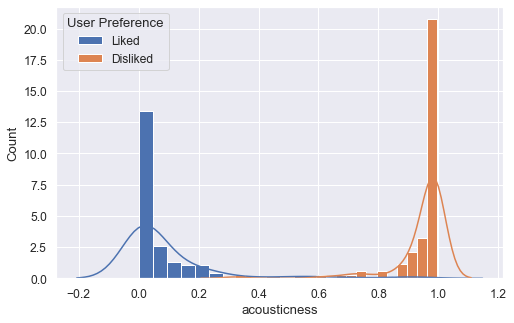

In [45]:
df_liked = df_combined[df_combined['user_preference']==1]
df_disliked = df_combined[df_combined['user_preference']==0]

sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df_liked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='acousticness', ylabel='Count')
sns.distplot(df_disliked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='acousticness', ylabel='Count')
plt.legend(title='User Preference', labels=['Liked', 'Disliked'])

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'tempo')]

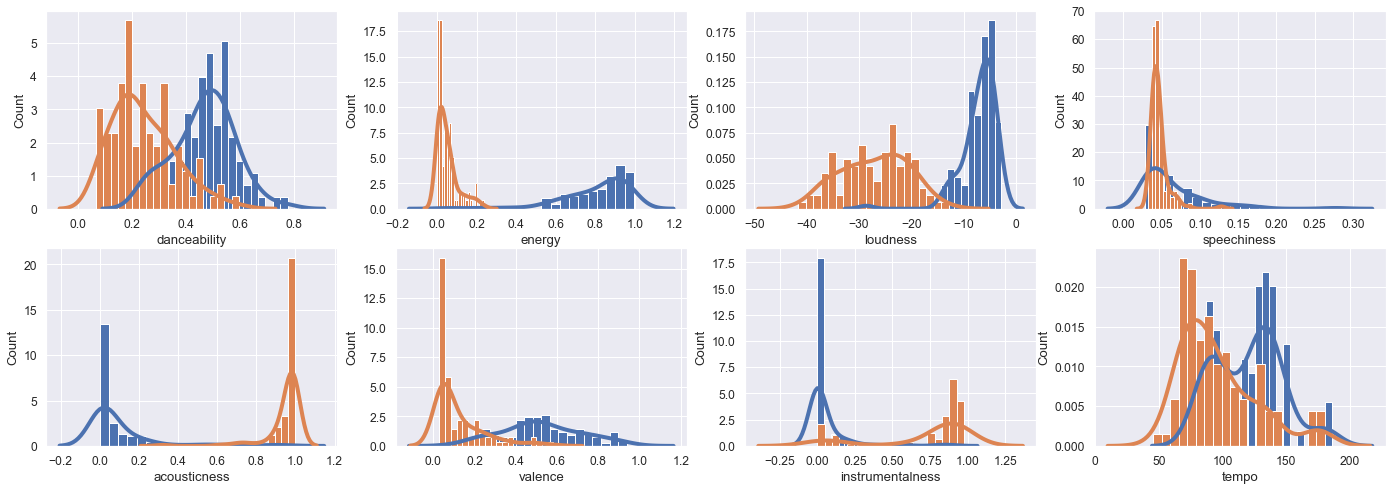

In [46]:
LikedId=playlistDictionary["Liked"]
DislikeId=playlistDictionary["Dislike"]
spotifyUsername='ernflerberg'

likedplay=sp.user_playlist(spotifyUsername, playlist_id=LikedId)
dislikeplay=sp.user_playlist(spotifyUsername, playlist_id=DislikeId)

df_liked = df_combined[df_combined['user_preference']==1]
df_disliked = df_combined[df_combined['user_preference']==0]

column=('songname', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'instrumentalness','tempo')
playlistList=[likedplay, dislikeplay]
n_bins=20
fig, axs = plt.subplots(figsize=(24, 8), nrows=2, ncols=4)
axs=axs.flatten()

    
sns.distplot(df_liked['danceability'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[0]).set(xlabel='danceability', ylabel='Count')
sns.distplot(df_disliked['danceability'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[0]).set(xlabel='danceability', ylabel='Count')
    
sns.distplot(df_liked['energy'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[1]).set(xlabel='energy', ylabel='Count')
sns.distplot(df_disliked['energy'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[1]).set(xlabel='energy', ylabel='Count')
    
sns.distplot(df_liked['loudness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[2]).set(xlabel='loudness', ylabel='Count')
sns.distplot(df_disliked['loudness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[2]).set(xlabel='loudness', ylabel='Count')
    
sns.distplot(df_liked['speechiness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[3]).set(xlabel='speechiness', ylabel='Count')
sns.distplot(df_disliked['speechiness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[3]).set(xlabel='speechiness', ylabel='Count')
    
sns.distplot(df_liked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[4]).set(xlabel='acousticness', ylabel='Count')
sns.distplot(df_disliked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[4]).set(xlabel='acousticness', ylabel='Count')
    
sns.distplot(df_liked['valence'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[5]).set(xlabel='valence', ylabel='Count')
sns.distplot(df_disliked['valence'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[5]).set(xlabel='valence', ylabel='Count')
    
sns.distplot(df_liked['instrumentalness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[6]).set(xlabel='instrumentalness', ylabel='Count')
sns.distplot(df_disliked['instrumentalness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[6]).set(xlabel='instrumentalness', ylabel='Count')
    
sns.distplot(df_liked['tempo'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[7]).set(xlabel='tempo', ylabel='Count')
sns.distplot(df_disliked['tempo'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[7]).set(xlabel='tempo', ylabel='Count')


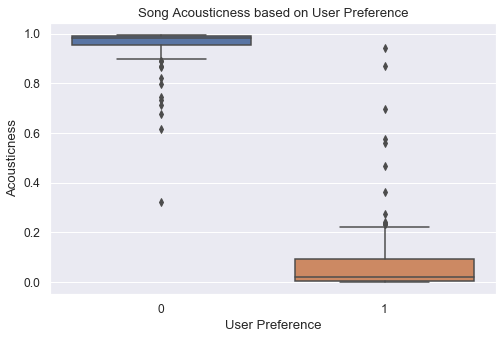

In [47]:
# plot a boxplot of acousticness for an overview
sns.boxplot(x='user_preference', y='acousticness', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Acousticness')
_ = plt.title('Song Acousticness based on User Preference')

plt.show()

#add hypothesis test

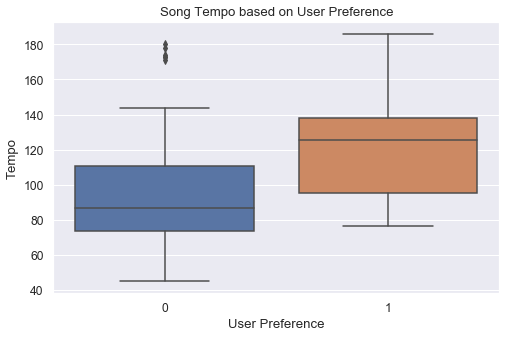

In [48]:
# plot a boxplot of tempo for an overview
sns.boxplot(x='user_preference', y='tempo', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Tempo')
_ = plt.title('Song Tempo based on User Preference')

plt.show()

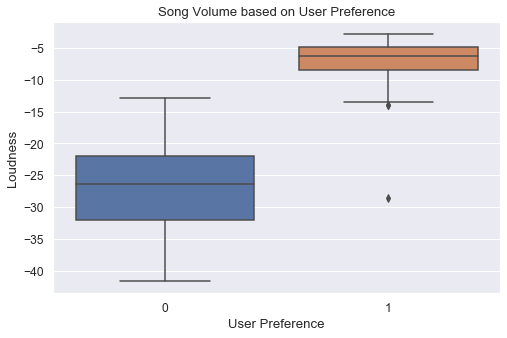

In [49]:
# plot a boxplot of tempo for an overview
sns.boxplot(x='user_preference', y='loudness', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Loudness')
_ = plt.title('Song Volume based on User Preference')

plt.show()

In [50]:
df_combined.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6yl8Es1tCYD9WdSkeVLFw4,2019-06-06T05:11:15Z,AC/DC,Who Made Who,210880,You Shook Me All Night Long,73,1,0.529,0.768,7,-5.510,1,0.0566,0.002240,0.000685,0.2970,0.769,127.316,4
1,3fkPMWQ6cBNBLuFcPyMS8s,2019-06-06T05:11:15Z,Blue Öyster Cult,Fire of Unknown Origin,271000,Burnin' for You,66,1,0.532,0.728,9,-9.079,0,0.0352,0.106000,0.010800,0.0849,0.690,134.303,4
2,5EWPGh7jbTNO2wakv8LjUI,2019-06-06T05:11:15Z,Lynyrd Skynyrd,Pronounced' Leh-'Nerd 'Skin-'Nerd,547106,Free Bird,71,1,0.252,0.844,0,-8.121,1,0.0572,0.076500,0.000180,0.0840,0.351,118.158,4
3,6QDbGdbJ57Mtkflsg42WV5,2019-06-06T05:11:15Z,Van Halen,1984 (Remastered),282746,Hot for Teacher - 2015 Remaster,67,1,0.551,0.947,2,-4.671,1,0.1520,0.000652,0.000257,0.0637,0.466,127.657,4
4,6J17MkMmuzBiIOjRH6MOBZ,2019-06-06T05:11:15Z,AC/DC,Back In Black,266040,Rock and Roll Ain't Noise Pollution,61,1,0.576,0.659,9,-5.617,1,0.0383,0.041000,0.000000,0.0587,0.717,94.853,4


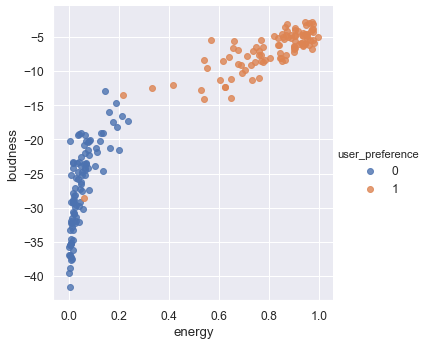

In [51]:
# Create a scatter plot
sns.lmplot(x='energy', y='loudness', data=df_combined,
           fit_reg=False, # No regression line
           hue='user_preference') 



In [52]:
# Pre-format DataFrame
stats_df = df_combined.drop(['song_id', 'added_at', 'artist', 'album', 'duration_ms', 'songname', 'popularity', 'tempo', 'key', 'mode','time_signature'], axis=1)

In [53]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*100
    dataNorm["user_preference"]=dataset["user_preference"]
    return dataNorm

In [54]:
normdata=normalize(stats_df)
normdata.sample(5)

,user_preference,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
55,0,0.000000,1.549452,35.329125,8.019246,95.883521,88.012295,5.363394,0.242157
37,1,65.886665,97.182815,96.658508,16.198877,0.088634,2.090164,27.461140,34.947716
57,0,8.937130,2.696448,41.030529,5.212510,98.995981,87.090164,11.917098,2.608696
15,0,64.758951,2.817185,26.415046,18.644747,99.799196,93.954918,8.262148,27.572922
33,1,62.644488,76.556998,89.050625,8.781075,15.561977,1.106557,7.071839,57.622455


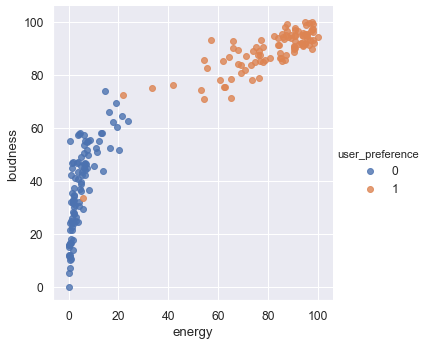

In [55]:
# Scatter plot
sns.lmplot(x='energy', y='loudness', data=normdata,
           fit_reg=False, # No regression line
           hue='user_preference') 

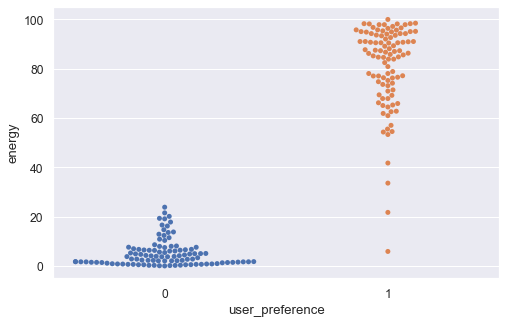

In [56]:
sns.swarmplot(x='user_preference', y='energy', data=normdata)